In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [6]:
# lstm price prediction
lstm_1 = pd.read_csv('prediction_result_3days_20220531.csv')
lstm_2 = pd.read_csv('prediction_result_3days_20220825.csv')
lstm_3 = pd.read_csv('prediction_result_3days_20221124.csv')
lstm_4 = pd.read_csv('prediction_result_3days_20230223.csv')
lstm_5 = pd.read_csv('prediction_result_3days_20230525.csv')
# lstm_6 = pd.read_csv('prediction_result_3days_200622.csv')

In [7]:
lstm_1

,Ticker,Ticker Format,Actual Price,Predicted Price,MSE,MAE,R2,Index,Market Share,Market Cap
0,ABDN LN Equity,ABDN.L,175.403336,163.509700,0.077741,0.278821,1,FTSE100,2180730112,3.570000e+11
1,BBOX LN Equity,BBOX.L,188.927795,208.257490,0.279559,0.528733,1,FTSE250,1868829952,3.890000e+11
2,BEZ LN Equity,BEZ.L,473.095398,459.970200,0.027568,0.166035,1,FTSE250,609896000,2.810000e+11
3,CCL LN Equity,CCL.L,1011.500000,1102.101700,0.004354,0.065982,1,FTSE250,1175079936,1.300000e+12
4,CNA LN Equity,CNA.L,74.384422,85.310745,0.139973,0.374130,1,FTSE250,5907449856,5.040000e+11
5,CTEC LN Equity,CTEC.L,212.978073,172.950680,1.607907,1.268033,1,FTSE250,2041760000,3.530000e+11
6,DLG LN Equity,DLG.L,250.364975,232.586900,1.044022,1.021774,1,FTSE250,1317529984,3.060000e+11
7,DLN LN Equity,DLN.L,2879.104248,2870.571800,0.000610,0.024702,1,FTSE250,112274000,3.220000e+11
8,DPH LN Equity,DPH.L,3567.611328,3383.690200,0.043994,0.209748,1,FTSE100,108389000,3.670000e+11
9,DPLM LN Equity,DPLM.L,2553.907471,2410.222700,0.045431,0.213145,1,FTSE250,124616000,3.000000e+11


## List out stocks that get in and out of FTSE100

In [8]:
def analyse_LSTM(merged) :
    merged = merged.sort_values(by='Market Cap', ascending = False).reset_index(drop=True)

    ftse_250 = merged[merged["Index"] =='FTSE250']
    ftse_100 = merged[merged["Index"] =='FTSE100']

    # list of stocks that is going into FTSE100
    stocks_into_FTSE100 = ftse_250[ftse_250.index<ftse_100.index[0]]['Ticker'].to_list()

    # number of stocks that is going into FTSE100
    number_of_stocks = len(stocks_into_FTSE100)

    # list of stocks that is going out from FTSE100
    stocks_out_from_FTSE100 = ftse_100['Ticker'].tail(number_of_stocks).to_list()

    return stocks_into_FTSE100, stocks_out_from_FTSE100

In [50]:
pd.DataFrame(analyse_LSTM(lstm_1)).T

,0,1
0,TUI LN Equity,HWDN LN Equity
1,CCL LN Equity,DPH LN Equity
2,CNA LN Equity,ICP LN Equity
3,EZJ LN Equity,HIK LN Equity
4,UTG LN Equity,ABDN LN Equity
5,BBOX LN Equity,HL LN Equity
6,WEIR LN Equity,ITV LN Equity
7,WIZZ LN Equity,IDS LN Equity


In [51]:
pd.DataFrame(analyse_LSTM(lstm_2)).T

,0,1
0,CCL LN Equity,HIK LN Equity


In [52]:
pd.DataFrame(analyse_LSTM(lstm_3)).T

,0,1
0,ITV LN Equity,ICP LN Equity
1,BBOX LN Equity,DPH LN Equity


In [53]:
pd.DataFrame(analyse_LSTM(lstm_4)).T

,0,1
0,CCL LN Equity,FRAS LN Equity


In [54]:
pd.DataFrame(analyse_LSTM(lstm_5)).T

,0,1
0,CCL LN Equity,BLND LN Equity


In [138]:
#this is the decision module
def confusion_matrix(merged_df, column, date):
    merged_df2 = merged_df.sort_values(by=column, ascending = False).reset_index(drop=True)
    ftse_250 = merged_df2[merged_df2["Index"] =='FTSE250']
    ftse_100 = merged_df2[merged_df2["Index"] =='FTSE100']

    # list of stocks that is going into FTSE100
    stocks_into_FTSE100 = ftse_250[ftse_250.index<ftse_100.index[0]]['Ticker'].to_list()

    # number of stocks that is going into FTSE100
    number_of_stocks = len(stocks_into_FTSE100)

    # list of stocks that is going out from FTSE100
    stocks_out_from_FTSE100 = ftse_100['Ticker'].tail(number_of_stocks).to_list()
    
    post_rebalancing = pd.read_csv("ftse100_rebalancing_summary.csv")
    post_rebalancing = post_rebalancing[post_rebalancing["Post Date"] ==  date]

    true_positive_100 =\
    (
        post_rebalancing[post_rebalancing["FTSE100"] == -1.0]["Ticker"]
    )
    true_negative_100 =\
    (
        post_rebalancing[post_rebalancing["FTSE100"] == 1.0]["Ticker"]
    )
    
    true_positive_count = 0
    true_negative_count = 0
    
    for outgoing in stocks_out_from_FTSE100:
        if true_positive_100.isin([outgoing]).any():
            true_positive_count+=1
    
    for incoming in stocks_into_FTSE100:
        if true_negative_100.isin([incoming]).any():
            true_negative_count+=1
            
    #reconfirm the top10 predicted
    going_up_length = len(stocks_into_FTSE100)

    retained_in_top10 = list(merged_df["Ticker"].iloc[:10 - going_up_length].values)
    retained_in_top10.extend(stocks_into_FTSE100)

    #reconfirm the bottom 25 predicted
    coming_down_length = len(stocks_out_from_FTSE100)

    retained_in_bottom25 = list(merged_df["Ticker"].iloc[(10 + coming_down_length):].values)
    retained_in_bottom25.extend(stocks_into_FTSE100)
    
    true_positive = true_positive_count / len(retained_in_top10 + retained_in_bottom25)
    false_positive = (len(retained_in_top10)-true_positive_count) / len(retained_in_top10 + retained_in_bottom25)
    true_negative = true_negative_count / len(retained_in_top10 + retained_in_bottom25)
    false_negative = (len(retained_in_bottom25)-true_negative_count) / len(retained_in_top10 + retained_in_bottom25)
    # consolidate

    my_array = [[0, 0], [0, 0]]

    my_array[0][0] = true_positive
    my_array[0][1] = false_positive
    my_array[1][0] = false_negative
    my_array[1][1] = true_negative

    
    # plot
    import seaborn as sns
    sns.heatmap(my_array, annot=True)
    return true_positive, false_positive, true_negative, false_negative
    

In [140]:
dates = ["20/6/22",'20/9/22','19/12/22','21/3/23','19/6/23']

(0.06060606060606061,
 0.24242424242424243,
 0.06060606060606061,
 0.6363636363636364)

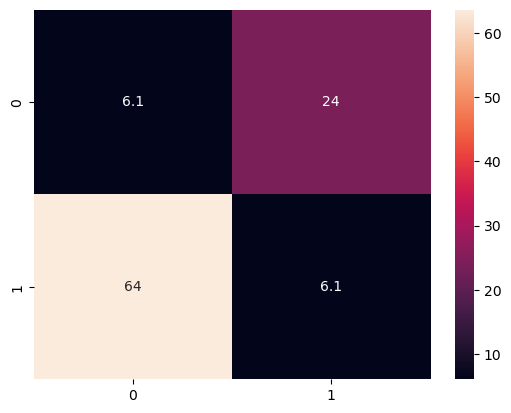

In [141]:
confusion_matrix(lstm_1, "Market Cap", dates[0])

(0.03225806451612903, 0.2903225806451613, 0.0, 0.6774193548387096)

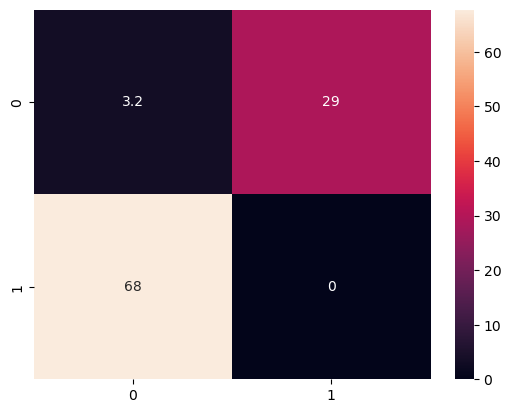

In [142]:
confusion_matrix(lstm_2, "Market Cap", dates[1])

(0.06451612903225806, 0.25806451612903225, 0.0, 0.6774193548387096)

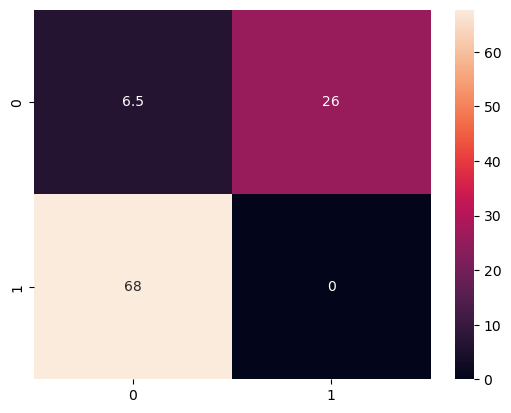

In [143]:
confusion_matrix(lstm_3, "Market Cap", dates[2])

(0.0, 0.3125, 0.0, 0.6875)

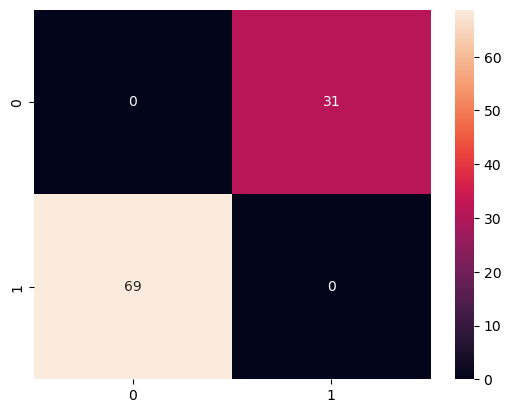

In [144]:
confusion_matrix(lstm_4, "Market Cap", dates[3])

(0.030303030303030304, 0.2727272727272727, 0.0, 0.696969696969697)

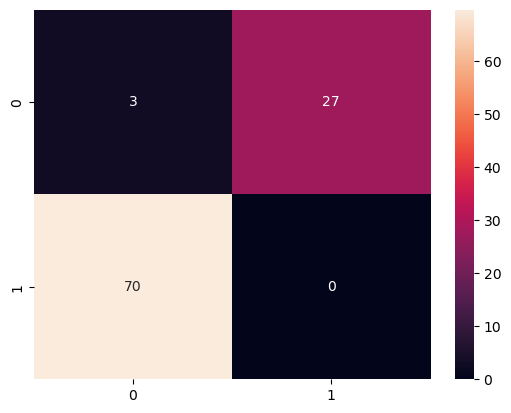

In [145]:
confusion_matrix(lstm_5, "Market Cap", dates[4])